# Supplement Sales Prediction
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.

## Data Dictionary
**Train Data**

- ID: Unique Identifier for a row
- Store_id: Unique id for each Store
- Store_Type: Type of the Store
- Location_Type: Type of the location where Store is located
- Region_Code: Code of the Region where Store is located
- Date: Information about the Date
- Holiday: If there is holiday on the given Date, 1 : Yes, 0 : No
- Discount: If discount is offered by store on the given Date, Yes/ No
- #Orders: Number of Orders received by the Store on the given Day
- Sales: Total Sale for the Store on the given Day

**Test Data**

All the columns as above except for *#Orders* and *Sales*

**Sample_Submission**

- ID: Unique Identifier for a row
- Sales: Total Sale for the Store on the given Day

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import datasets

In [2]:
train = pd.read_csv('TRAIN.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test = pd.read_csv('TEST_FINAL.csv')
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


## Data exploration
Let's examine the train and test sets in a bit more detail before we clean them for our model.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


We can see that there are no null values in either the train or the test set.

In [6]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [7]:
test.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


Nothing interesting found in the datasets from a statistical perspective.

## Data cleaning
Let's perform some basic data cleaning so that our datasets are in a better shape before we use them in an ML model. We shall start off by removing the *ID* columns in both the datasets. Also, notice that the *#Order* column is available in the train set but not in the test set. We shall remove this column as well.

In [8]:
train.drop(['ID', '#Order'], axis=1, inplace=True)
train.reset_index()
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,45614.52


In [9]:
test.drop('ID', axis=1, inplace=True)
test.reset_index()
test.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,171,S4,L2,R3,2019-06-01,0,No
1,172,S1,L1,R1,2019-06-01,0,No
2,173,S4,L2,R1,2019-06-01,0,No
3,174,S1,L1,R4,2019-06-01,0,No
4,170,S1,L1,R2,2019-06-01,0,No


Let's now look at the different values present in some categorical columns of the train set.

In [10]:
train['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [11]:
train['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [12]:
train['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

## Feature engineering on train set
Let's look at the months and years instead of dates for each sale record in the train set. We shall use these as features if we find them to be an important factor during our data visualisation.

In [13]:
train['Date']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
188335    2019-05-31
188336    2019-05-31
188337    2019-05-31
188338    2019-05-31
188339    2019-05-31
Name: Date, Length: 188340, dtype: object

In [14]:
# Extracting the year from the date
train['Year'] = train['Date'].apply(lambda date: date.split('-')[0])
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Year
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,2018
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12,2018
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20,2018
3,251,S2,L3,R1,2018-01-01,1,Yes,19715.16,2018
4,250,S2,L3,R4,2018-01-01,1,Yes,45614.52,2018


In [15]:
# Extracting the month from the date
train['Month'] = train['Date'].apply(lambda date: date.split('-')[1])
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales,Year,Month
0,1,S1,L3,R1,2018-01-01,1,Yes,7011.84,2018,01
1,253,S4,L2,R1,2018-01-01,1,Yes,51789.12,2018,01
2,252,S3,L2,R1,2018-01-01,1,Yes,36868.20,2018,01
3,251,S2,L3,R1,2018-01-01,1,Yes,19715.16,2018,01
4,250,S2,L3,R4,2018-01-01,1,Yes,45614.52,2018,01


In [16]:
train.drop('Date', axis=1, inplace=True)
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month
0,1,S1,L3,R1,1,Yes,7011.84,2018,01
1,253,S4,L2,R1,1,Yes,51789.12,2018,01
2,252,S3,L2,R1,1,Yes,36868.20,2018,01
3,251,S2,L3,R1,1,Yes,19715.16,2018,01
4,250,S2,L3,R4,1,Yes,45614.52,2018,01


## Data visualisation
Now, let's examine our train set visually to identify interesting trends that can help us in making predictions for sales in the test set.

### Factor 1 - Number of sales
The first factor that we shall examine across multiple variables is the number of sales made.

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

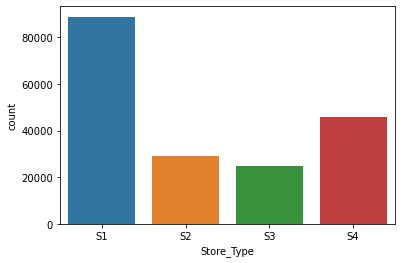

In [17]:
sns.countplot(x='Store_Type', data=train, order=['S1', 'S2', 'S3', 'S4'])

#### Observation
The highest number of sales was made in stores with a store type of S1.

<AxesSubplot:xlabel='Location_Type', ylabel='count'>

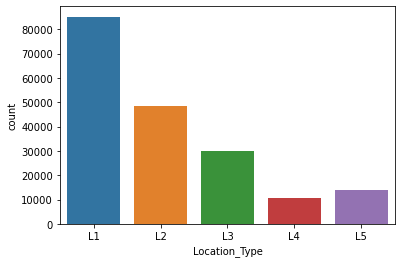

In [18]:
sns.countplot(x='Location_Type', data=train, order=['L1', 'L2', 'L3', 'L4', 'L5'])

#### Observation
The maximum number of sales was made in stores with a location type L1.

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

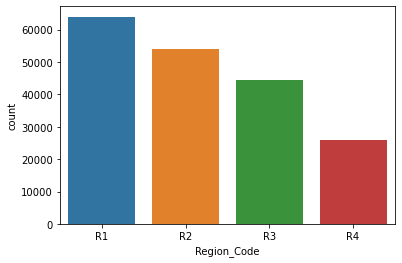

In [19]:
sns.countplot(x='Region_Code', data=train, order=['R1', 'R2', 'R3', 'R4'])

#### Observation
The maximum number of sales was made in stores with a region code of R1.

<AxesSubplot:xlabel='Holiday', ylabel='count'>

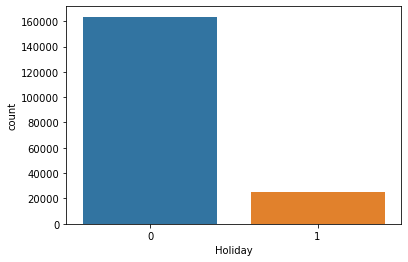

In [20]:
sns.countplot(x='Holiday', data=train)

#### Observation
Almost 8 times more sales were made on non-holidays than on holidays. This seems to be a huge factor in predicting the number of sales.

<AxesSubplot:xlabel='Discount', ylabel='count'>

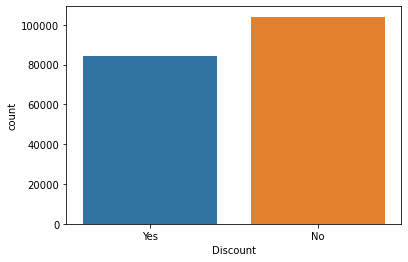

In [21]:
sns.countplot(x='Discount', data=train)

#### Observation
Almost 20% more sales were made without giving a discount.

<AxesSubplot:xlabel='Year', ylabel='count'>

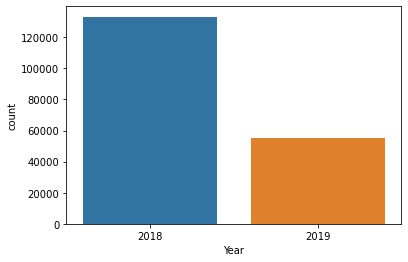

In [22]:
sns.countplot(x='Year', data=train)

#### Observation
The number of sales made in 2018 is more than twice of that in 2019.

<AxesSubplot:xlabel='Month', ylabel='count'>

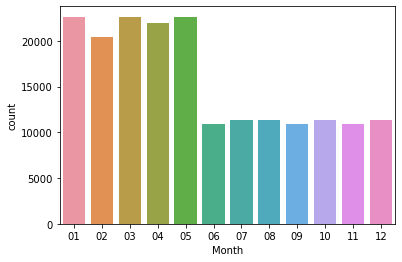

In [23]:
sns.countplot(x='Month', data=train)

#### Observation
Our extraction of months from dates proved to be quite useful! Notice that the number of sales made in the first 5 months is significantly higher than (around twice as much as) that for the rest of the months.

### Factor 2 - Amount of sales
The next factor that we shall consider is the amount of sales made.

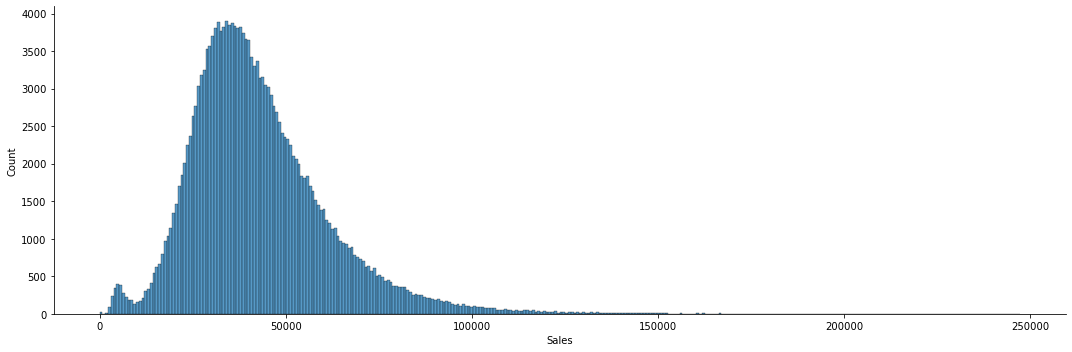

In [24]:
sns.displot(train['Sales'], aspect=3)

#### Observation
The sales amount for a sales record generally lies in the range of roughly 30,000-40,0000.

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

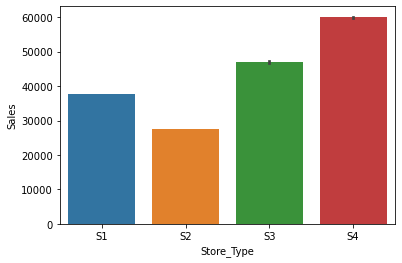

In [25]:
sns.barplot(x='Store_Type', y='Sales', data=train, order=['S1', 'S2', 'S3', 'S4'])

#### Observation
The total amount of sales made is the highest for the store type S4.

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

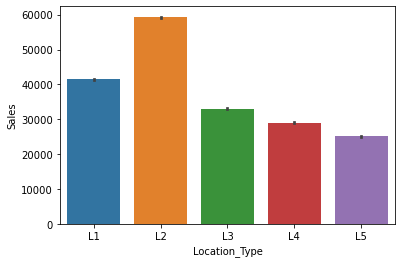

In [26]:
sns.barplot(x='Location_Type', y='Sales', data=train, order=['L1', 'L2', 'L3', 'L4', 'L5'])

#### Observation
The total amount of sales made is the highest for the location type L2.

<AxesSubplot:xlabel='Region_Code', ylabel='Sales'>

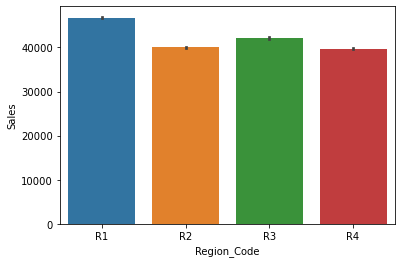

In [27]:
sns.barplot(x='Region_Code', y='Sales', data=train, order=['R1', 'R2', 'R3', 'R4'])

<AxesSubplot:xlabel='Holiday', ylabel='Sales'>

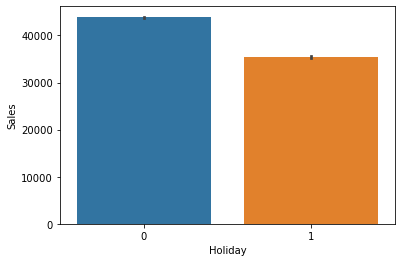

In [28]:
sns.barplot(x='Holiday', y='Sales', data=train)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

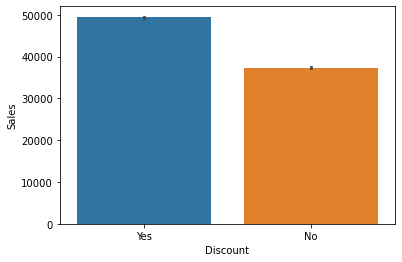

In [29]:
sns.barplot(x='Discount', y='Sales', data=train)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

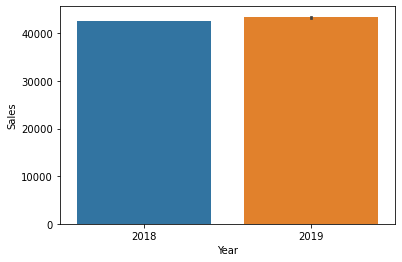

In [30]:
sns.barplot(x='Year', y='Sales', data=train)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

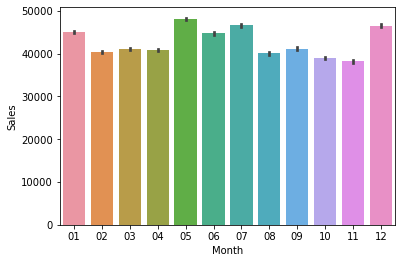

In [31]:
sns.barplot(x='Month', y='Sales', data=train)

#### Observation
The following features don't really affect the total amount of sales:
- Region_Code
- Holiday
- Discount
- Year
- Month

**Since the year and month don't really make a difference to the sales, we shall drop these columns before building our model.**

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

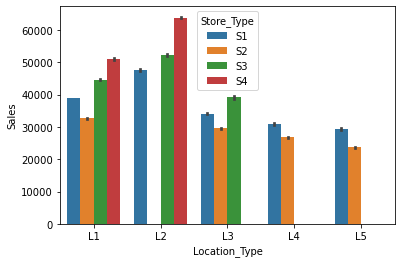

In [32]:
sns.barplot(
    x='Location_Type',
    y='Sales',
    data=train,
    hue='Store_Type',
    order=['L1', 'L2', 'L3', 'L4', 'L5'],
    hue_order=['S1', 'S2', 'S3', 'S4']
)

#### Observation
- Only the store type S1 is available in all location types.
- S4 is the leading store type for location types L1 and L2. For L3, it is S3. Finally, for L4 and L5, the leading store type in terms of sales is S1.

## Data preparation
Before proceeding with encoding the categorical features, let's drop the columns that we won't require in the train and test sets. These are *Store_id*, *Date*, *Year* and *Month*.

In [33]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month
0,1,S1,L3,R1,1,Yes,7011.84,2018,01
1,253,S4,L2,R1,1,Yes,51789.12,2018,01
2,252,S3,L2,R1,1,Yes,36868.20,2018,01
3,251,S2,L3,R1,1,Yes,19715.16,2018,01
4,250,S2,L3,R4,1,Yes,45614.52,2018,01


In [34]:
train.drop(['Store_id', 'Year', 'Month'], axis=1, inplace=True)
train.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,S1,L3,R1,1,Yes,7011.84
1,S4,L2,R1,1,Yes,51789.12
2,S3,L2,R1,1,Yes,36868.20
3,S2,L3,R1,1,Yes,19715.16
4,S2,L3,R4,1,Yes,45614.52


In [35]:
test.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,171,S4,L2,R3,2019-06-01,0,No
1,172,S1,L1,R1,2019-06-01,0,No
2,173,S4,L2,R1,2019-06-01,0,No
3,174,S1,L1,R4,2019-06-01,0,No
4,170,S1,L1,R2,2019-06-01,0,No


In [36]:
test.drop(['Store_id', 'Date'], axis=1, inplace=True)
test.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,S4,L2,R3,0,No
1,S1,L1,R1,0,No
2,S4,L2,R1,0,No
3,S1,L1,R4,0,No
4,S1,L1,R2,0,No


## Feature encoding
Let's encode our categorical features in the train and test set.

In [37]:
cat_feats = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount']

In [38]:
final_train = pd.get_dummies(train, columns=cat_feats, drop_first=True)
final_train.head()

,Holiday,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_Yes
0,1,7011.84,0,0,0,0,1,0,0,0,0,0,1
1,1,51789.12,0,0,1,1,0,0,0,0,0,0,1
2,1,36868.20,0,1,0,1,0,0,0,0,0,0,1
3,1,19715.16,1,0,0,0,1,0,0,0,0,0,1
4,1,45614.52,1,0,0,0,1,0,0,0,0,1,1


In [39]:
final_test = pd.get_dummies(test, columns=cat_feats, drop_first=True)
final_test.head()

,Holiday,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_Yes
0,0,0,0,1,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0


## Train and test data
Let's build our model by splitting the final_train set itself before making a final submission.

In [40]:
X = final_train.drop('Sales', axis=1)
X.head()

,Holiday,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_Yes
0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,1,1,0,0,0,0,0,0,1
2,1,0,1,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,0,0,1,1


In [41]:
y = final_train[['Sales']]
y.head()

,Sales
0,7011.84
1,51789.12
2,36868.20
3,19715.16
4,45614.52


In [42]:
# X.info()

Let's convert the values in the 'Holiday' column to float before using them in our model.

In [43]:
# X['Holiday'] = X['Holiday'].astype(float)
# X['Holiday']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Training the model

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rfr = RandomForestRegressor(random_state=0)

In [48]:
rfr.fit(X_train, y_train)

<ipython-input-48-e1b1f0422edb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

## Predicting on test data

In [49]:
predictions = rfr.predict(X_test)
predictions

array([60894.18856503, 26317.42420531, 30512.36286838, ...,
       22160.29300154, 32644.83253003, 36645.90586439])

Text(0, 0.5, 'Predicted Y')

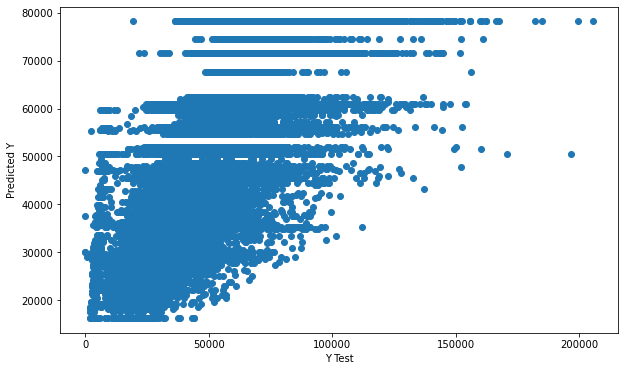

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model evaluation

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions), 2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions), 2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

MAE: 8347.21
MSE: 143743735.16
RMSE: 11989.32


In [53]:
round(metrics.explained_variance_score(y_test, predictions), 4)

0.5722

We get an R^2 value of around 57% from our random forest model.

## Submission

In [54]:
submission = pd.read_csv('SAMPLE.csv')
final_predictions = rfr.predict(final_test)
submission['Sales'] = np.round(final_predictions, 2)
submission.head()

,ID,Sales
0,T1188341,51913.53
1,T1188342,33429.21
2,T1188343,60894.19
3,T1188344,35373.49
4,T1188345,34871.50


In [55]:
submission.to_csv('final_submission_random_forest.csv', index=False)

## Conclusion
We were able to draw some interesting insights as well as create a decent model to predict sales values based on the given parameters. Let's summarise our inferences:
- The sales amount for a sales record generally lies in the range of roughly 30,000-40,0000.
- The total amount of sales made is the highest for the store type S4.
- The total amount of sales made is the highest for the location type L2.
- The following features don't really affect the total amount of sales: *Region_Code*, *Holiday*, *Discount*, *Year*, *Month*.
- Only the store type S1 is available in all location types.
- S4 is the leading store type for location types L1 and L2. For L3, it is S3. Finally, for L4 and L5, the leading store type in terms of sales is S1.